## Summary

In this clustering project a set of NBA players is grouped in such a way that NBA players in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

This done by implementing the K-Means algorithm in step by step code and also using as an comparable sklearn, after exploring and cleaning the data.

The data is based on player performance from the 2013-2014 season collected by <a href="https://www.rotowire.com/"> rotwire</a> .



In [353]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

from matplotlib.pyplot import cm
import seaborn as sns
import numpy as np
import math
from sklearn.cluster import KMeans

## Import packages

In [354]:

basketball = pd.read_csv("nba_2013.csv")
basketball .head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [355]:
basketball.tail(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,...,179,282,36,18,38,60,137,399,2013-2014,2013


In [356]:
basketball.shape

(481, 31)

In [357]:
basketball.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [358]:
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [359]:
basketball.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [360]:
basketball.tail()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,...,179,282,36,18,38,60,137,399,2013-2014,2013


Check for 0 values

#### Missing values?

In [361]:
basketball.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

Imputing missing values with median.

In [362]:
x3p_median =  basketball['x3p.'].median()
print(x3p_median )

ft_median = basketball['ft.'].median()
print(ft_median)

basketball['x3p.'] = basketball['x3p.'].fillna(value=x3p_median).copy()
basketball['ft.'] = basketball['ft.'].fillna(value=ft_median).copy()


0.3309764477418715
0.7509999999999999


In [363]:
basketball[['x3p.', 'ft.']].isnull().sum()

x3p.    0
ft.     0
dtype: int64

In [364]:
# select numeric variables 
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html
# numpy.r is awesome!

basketball_1 = basketball.iloc[:,np.r_[2, 4:28]].copy()
print(basketball_1.shape )
print(type(basketball_1))
basketball_1.head(2)

(481, 25)
<class 'pandas.core.frame.DataFrame'>


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,136,0.581,142,190,332,43,40,57,71,203


#### Data visualization

Distribution of the age variable of players

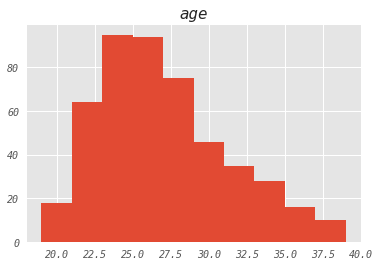

In [365]:
basketball_1.hist('age')
plt.show()

The age of most players were between 22.5 and 30.

Distributions of number of games the player was in

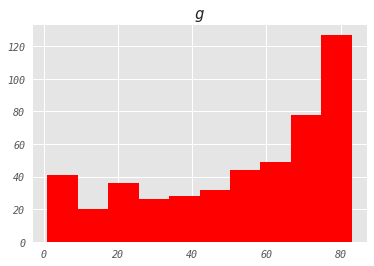

In [366]:
basketball_1.hist('g', color="red")
plt.show()

The variable is skewed to the left. Most frequently players were in 60 to 80 games.<br>
Probability_distribution_fitting: https://en.wikipedia.org/wiki/Probability_distribution_fitting

Distributions of numeric variables of player performance

In [367]:
# Prepare color list assign each plot a different color
color_list=[]

color=iter(cm.rainbow(np.linspace(0,1,25)))
for b in range(25):
   c=next(color)
   color_list.append(c)

color_list[0:2]   

[array([ 0.5,  0. ,  1. ,  1. ]),
 array([ 0.42156863,  0.12288829,  0.99810333,  1.        ])]

Distributions of numeric variables of player performance visualized with histograms.

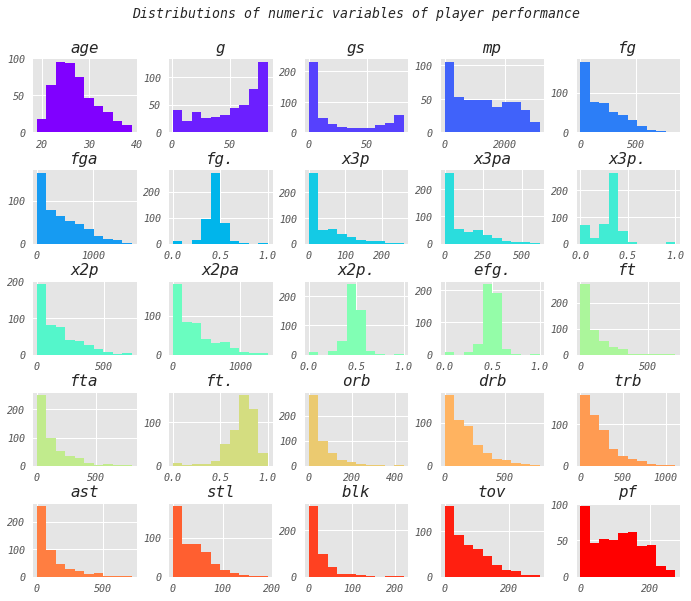

In [368]:
# from matplotlib.pyplot import cm
np.warnings.filterwarnings('ignore')

basketball_names=list(basketball_1.columns)


fig, axs = plt.subplots(5,5, figsize=(15,9))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)

axs = axs.ravel()
fig.suptitle('Distributions of numeric variables of player performance')


for i in range(0,25):
    axs[i].hist(basketball_1.iloc[:,i], color=color_list[i])
    axs[i].set_title(basketball_names[i])
plt.show()

Distributions of numeric variables of player performance visualized with boxplots.

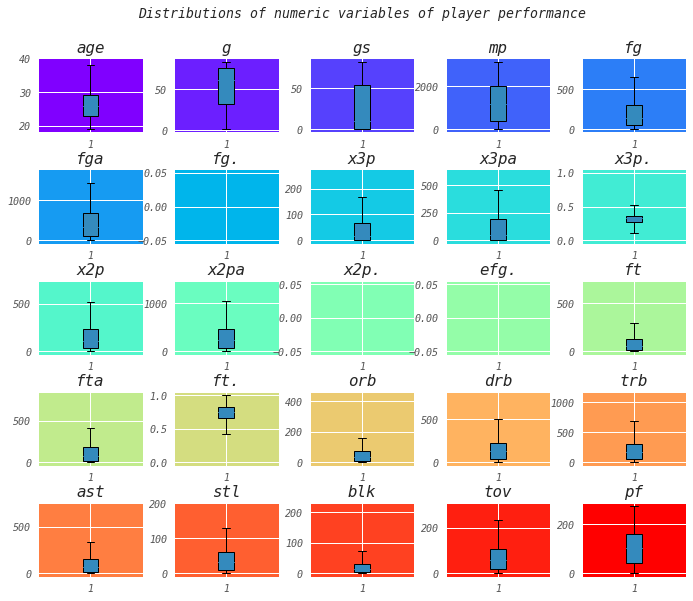

In [369]:
np.warnings.filterwarnings('ignore')
    
    
fig, axs = plt.subplots(5,5, figsize=(15,9))
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)

axs = axs.ravel()
fig.suptitle('Distributions of numeric variables of player performance')


for i in range(0,25):
    axs[i].boxplot(basketball_1.iloc[:,i], patch_artist=True)
    axs[i].set_facecolor(color_list[i])
    axs[i].set_title(basketball_names[i])
plt.show()

#### Correlations

In [370]:
basketball_1_corr_matrix=basketball_1.corr()
basketball_1_corr_matrix.head(3)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025221,0.050611,0.028850,0.013248,...,-0.061751,0.021540,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.322201,0.518074,0.537011,0.057541,...,0.615001,0.216262,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234677,0.501808,0.515718,0.038062,...,0.720527,0.169176,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573


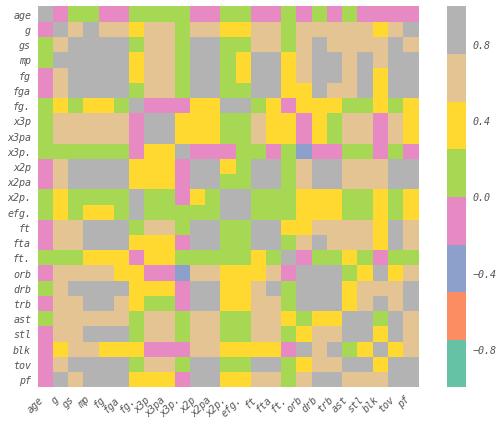

In [371]:
dimensions_1 = (10, 7)
fig, ax = plt.subplots(figsize=dimensions_1)

ax = sns.heatmap(
    basketball_1_corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap="Set2",
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [372]:
basketball_1.iloc[:,3:10].columns

Index(['mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.'], dtype='object')

#### Linear relationships

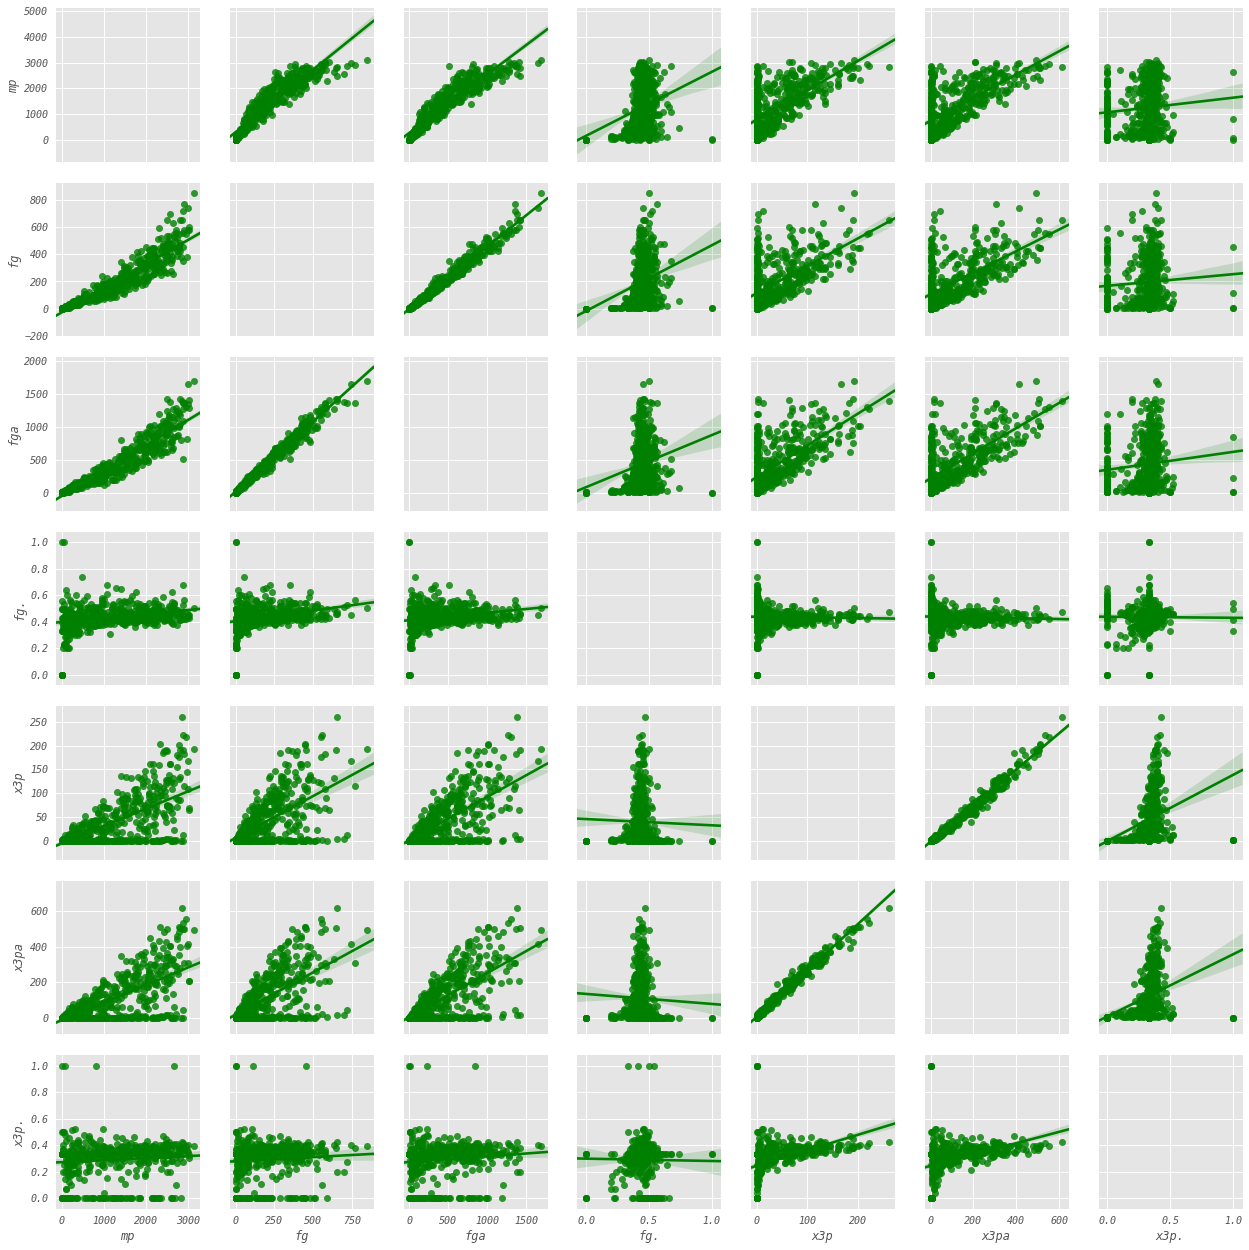

In [373]:
plt.style.use(['ggplot'])
g = sns.PairGrid(basketball_1.iloc[:,3:10])
g=g.map_offdiag(sns.regplot, color="green")
plt.show()

#### Aggregation

In [374]:
basketball.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [375]:
age_vc = basketball['age'].value_counts()
print(age_vc)

25    51
23    50
24    45
26    43
22    41
27    39
28    36
29    29
21    23
31    21
33    20
30    17
20    16
32    14
35    10
34     8
36     6
37     6
39     2
38     2
19     2
Name: age, dtype: int64


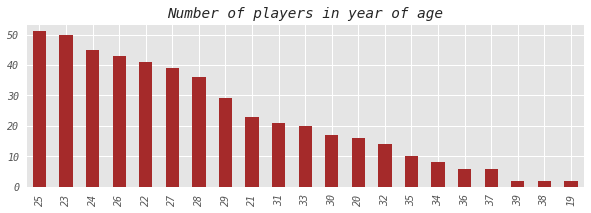

In [376]:
age_vc.plot(kind="bar", color="brown", title="Number of players in year of age", figsize=(10,3))

In [377]:
goupby_age = basketball.groupby('age').aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(2).T
goupby_age.iloc[:9, 0:5]

age           19     20     21     22     23
g  mean    64.50  57.88  57.83  50.05  48.30
   std     17.68  23.46  25.50  25.28  28.51
   median  64.50  64.50  70.00  54.00  57.50
   min     52.00   6.00   3.00   2.00   2.00
   max     77.00  82.00  82.00  82.00  82.00
   count    2.00  16.00  23.00  41.00  50.00
gs mean    11.50  28.94  19.22  20.46  25.14
   std     16.26  30.28  26.31  26.98  31.91
   median  11.50  18.00   4.00   9.00   5.50

In [378]:
pos_vc = basketball['pos'].value_counts()
print(pos_vc)

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64


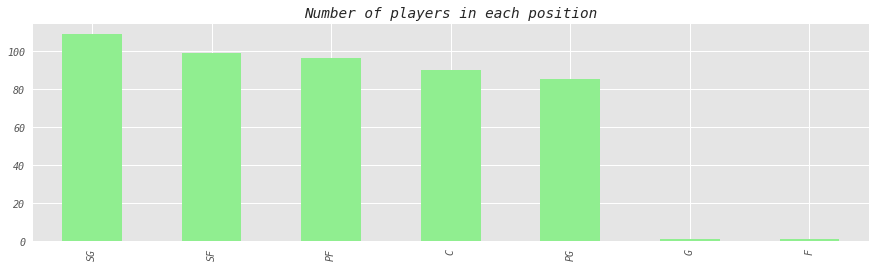

In [379]:
pos_vc.plot(kind="bar", color="lightgreen", title="Number of players in each position", figsize=(15,4))

In [380]:
groupby_pos = basketball.groupby('pos').aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(2).T
groupby_pos.iloc[:9, 0:5]

pos             C     F     G     PF     PG
age mean    26.41  31.0  26.0  27.09  26.59
    std      4.01   NaN   NaN   3.89   4.22
    median  26.00  31.0  26.0  26.50  26.00
    min     20.00  31.0  26.0  21.00  20.00
    max     37.00  31.0  26.0  37.00  39.00
    count   90.00   1.0   1.0  96.00  85.00
g   mean    50.96   1.0   5.0  56.97  54.45
    std     23.99   NaN   NaN  23.19  24.78
    median  54.50   1.0   5.0  64.00  63.00

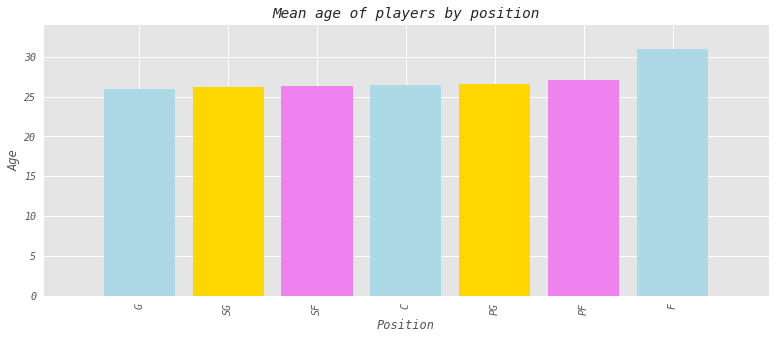

In [381]:
df_pos = pd.DataFrame(groupby_pos)
pos_age_mean = df_pos.loc[('age', 'mean'), :].sort_values()
pos_cols = pos_age_mean.index

f = plt.figure(figsize=(13,5))
plt.bar(x=pos_cols, height=pos_age_mean, color=['lightblue', "gold", "violet"])
plt.xticks(pos_cols, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
plt.title("Mean age of players by position")
plt.ylabel("Age")
plt.xlabel("Position")
plt.show()

In [382]:
print(basketball['season'].unique())
# print(basketball[ 'season_end'].value_counts())
groupby_season = basketball.groupby('season').aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(2).T
groupby_season.iloc[:9, 0:5]

['2013-2014']


season      2013-2014
age mean        26.51
    std          4.20
    median      26.00
    min         19.00
    max         39.00
    count      481.00
g   mean        53.25
    std         25.32
    median      61.00

In [383]:
bref_team_id_vc = basketball['bref_team_id'].value_counts()
bref_team_id_vc[:6]

TOT    63
NOP    18
OKC    17
LAL    16
LAC    16
UTA    16
Name: bref_team_id, dtype: int64

In [384]:
groupby_bref = basketball.groupby('bref_team_id').aggregate(['mean', 'std', 'median', 'min', 'max', 'count']).round(2).T
groupby_bref.iloc[:9, 0:5]

bref_team_id    ATL    BOS    BRK    CHA    CHI
age mean      26.40  25.29  29.80  25.85  29.27
    std        3.91   3.79   4.78   4.02   5.46
    median    27.00  24.00  29.00  26.00  28.00
    min       20.00  21.00  23.00  20.00  22.00
    max       34.00  33.00  37.00  34.00  38.00
    count     15.00  14.00  15.00  13.00  11.00
g   mean      51.47  50.00  53.20  54.69  60.18
    std       26.73  28.13  24.60  26.87  29.54
    median    60.00  59.00  64.00  64.00  76.00

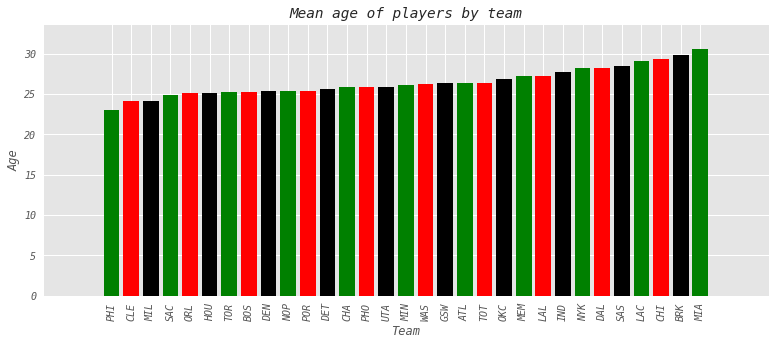

In [385]:
df_bref = pd.DataFrame(groupby_bref)
bref_age_mean = df_bref.loc[('age', 'mean'), :].sort_values()
bref_cols = bref_age_mean.index

f = plt.figure(figsize=(13,5))
plt.bar(x=bref_cols, height=bref_age_mean, color=['green', "red", "black"])
plt.xticks(bref_cols, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
plt.title("Mean age of players by team")
plt.ylabel("Age")
plt.xlabel("Team")
plt.show()

In [386]:
basketball.pos.unique()
point_guards = basketball.query("pos == 'PG'")
point_guards.iloc[:3,:3]

,player,pos,age
24,D.J. Augustin,PG,26
29,Leandro Barbosa,PG,31
30,Jose Barea,PG,29


### Data modeling 1: K-Means on age and scores

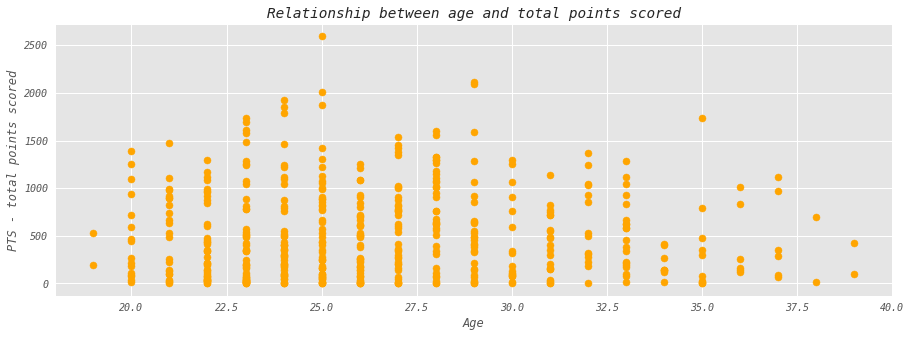

In [387]:
# g -- number of games the player was in
# pts -- total points scored by player

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,5))
ax.scatter(x=basketball.age, y=basketball.pts, color="orange")
ax.set_title("Relationship between age and total points scored")
ax.set_xlabel("Age")
ax.set_ylabel("PTS - total points scored")


plt.show()

In [388]:
number_clusters_1 = 6
# Initialize the clusters by randomly choosing some points out of the data set
random_initial_points_1 = np.random.choice(basketball.index, size=number_clusters_1)
# The random point are the centroids
# Later the distances of all observations to the centroids is calculated
# Observations are assigned to a centroid with the lowest Euclidian distance.
centroids_1 = basketball.loc[random_initial_points_1]
# The centroids are actual observations of the data set, in this case players
print(centroids_1.iloc[:,:4])
print(centroids_1.shape)

             player pos  age bref_team_id
401     Jason Smith  PF   27          NOP
153   Joel Freeland   C   26          POR
65   MarShon Brooks  SG   25          TOT
294   C.J. McCollum  SG   22          POR
11   Louis Amundson  PF   31          TOT
322    Toure' Murry  PG   24          NYK
(6, 31)


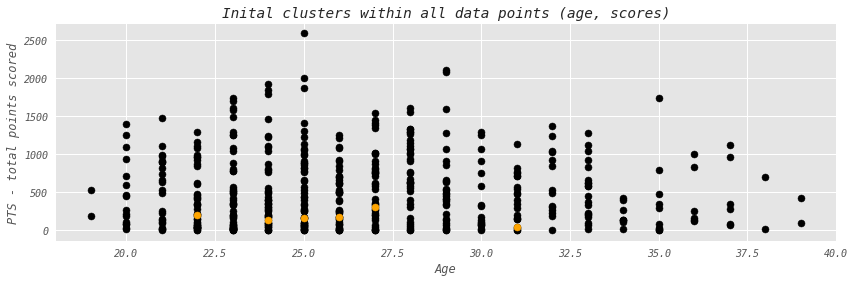

In [389]:
fig, ax = plt.subplots(1,1,figsize=(14,4))
ax.scatter(basketball['age'], basketball['pts'], c='black')
ax.scatter(centroids_1['age'], centroids_1['pts'], c='orange')
ax.set_title("Inital clusters within all data points (age, scores)")
ax.set_xlabel("Age")
ax.set_ylabel("PTS - total points scored")
plt.show()

In [390]:
# for index, row in basketball.iterrows():
     # print(index, row['age'])

In [391]:
def centroids_to_dict(centroids, variable1, variable2):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row[variable1], row[variable2]]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

In [392]:
centroids_dict_1 = centroids_to_dict(centroids_1, "age", "pts")

print(len(centroids_1))
centroids_dict_1

6


{0: [27, 301],
 1: [26, 174],
 2: [25, 159],
 3: [22, 201],
 4: [31, 38],
 5: [24, 140]}

#### Eucledian distances

Determining eucledian distance between the cluster and the observations.

In [393]:
# import math

def eucledian_distance_cluster_value(centroid_values, observation_values):
    term = 0
    
    for i in range(0, len(centroid_values)):
        difference = centroid_values[i] - observation_values[i]
        product = difference**2
        term += product
    
    eucledian_distance = math.sqrt(term)
    return eucledian_distance
    

In [394]:
centroid_values_1 = list(basketball.loc[5, ['age', 'pts']])
print(centroid_values_1)
observation_values_1 = [31, 1134]
print(observation_values_1)

eucled1 = eucledian_distance_cluster_value(centroid_values_1, observation_values_1)
print(eucled1)

eucled2= eucledian_distance_cluster_value([5, 2], [3,1])
print(eucled2)

[25, 92]
[31, 1134]
1042.0172743289816
2.23606797749979


In [395]:
def assign_to_cluster(row, centroids_dict, variable1, variable2):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row[variable1], row[variable2]]
        euclidean_distance = eucledian_distance_cluster_value(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster
    
    
    

In [396]:
basketball_3 = basketball.copy()

basketball_3['cluster'] = basketball_3.apply(lambda row: assign_to_cluster(row, centroids_dict_1, "age", "pts"), axis=1)

basketball_3.columns
basketball_3.loc[0:15, ['player', 'pos', 'age', 'pts', 'cluster']]

,player,pos,age,pts,cluster
0,Quincy Acy,SF,23,171,1
1,Steven Adams,C,20,265,0
2,Jeff Adrien,PF,27,362,0
3,Arron Afflalo,SG,28,1330,0
4,Alexis Ajinca,C,25,328,0
5,Cole Aldrich,C,25,92,5
6,LaMarcus Aldridge,PF,28,1603,0
7,Lavoy Allen,PF,24,303,0
8,Ray Allen,SG,38,701,0
9,Tony Allen,SG,32,495,0


In [397]:
basketball_3.cluster.value_counts()

0    294
4    101
5     37
3     28
1     11
2     10
Name: cluster, dtype: int64

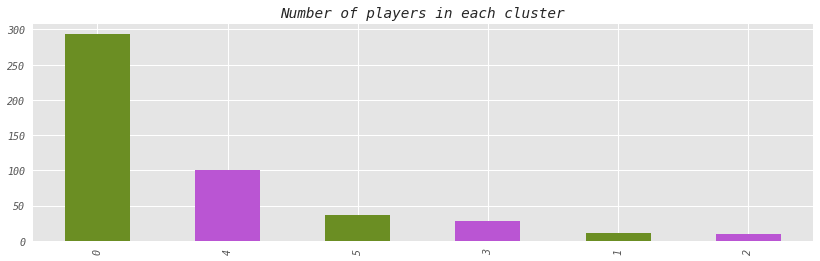

In [398]:
basketball_3.cluster.value_counts().plot(kind="bar", color=['olivedrab', 'mediumorchid'],
                                         title="Number of players in each cluster", 
                                         figsize=(14,4))

In [399]:

def cluster_visualization(df, variable1, variable2, number_clusters):
    for n in range(number_clusters):
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        clustered_df = df[df.cluster == n]
        plt.scatter(clustered_df[variable1], clustered_df[variable2], c=colors[n-1])
        plt.xlabel(variable1, fontsize=13)
        plt.ylabel(variable2, fontsize=13)
        
    plt.show()

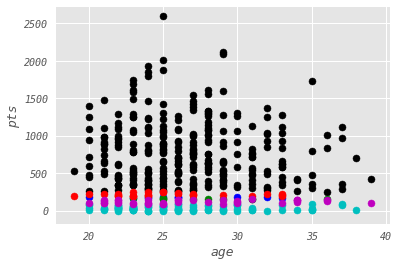

In [400]:
cluster_visualization(basketball_3, 'age', 'pts', number_clusters_1)

In [401]:
def recalculate_centroids(df, variable1, variable2, number_clusters):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, number_clusters):
        #Finish the logic
        values_in_cluster = df[df['cluster'] == cluster_id]
        new_centroid =[np.average(values_in_cluster[variable1]),np.average(values_in_cluster[variable2])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict
    
    
        


centroids_dict_11 = recalculate_centroids(basketball_3, 'age', 'pts', number_clusters_1)
centroids_dict_11

{0: [26.639455782312925, 786.44217687074831],
 1: [26.272727272727273, 177.18181818181819],
 2: [28.0, 158.90000000000001],
 3: [25.357142857142858, 214.53571428571428],
 4: [26.128712871287128, 33.257425742574256],
 5: [27.054054054054053, 117.78378378378379]}

In [402]:
basketball_4 = basketball_3.copy()

basketball_4['cluster'] = basketball_4.apply(lambda row: assign_to_cluster(row, centroids_dict_11, "age", "pts"), 
                                             axis=1)

In [403]:
basketball_4.loc[0:15, ['player', 'pos', 'age', 'pts', 'cluster']]

,player,pos,age,pts,cluster
0,Quincy Acy,SF,23,171,1
1,Steven Adams,C,20,265,3
2,Jeff Adrien,PF,27,362,3
3,Arron Afflalo,SG,28,1330,0
4,Alexis Ajinca,C,25,328,3
5,Cole Aldrich,C,25,92,5
6,LaMarcus Aldridge,PF,28,1603,0
7,Lavoy Allen,PF,24,303,3
8,Ray Allen,SG,38,701,0
9,Tony Allen,SG,32,495,3


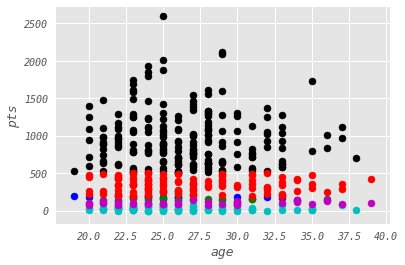

In [404]:
cluster_visualization(basketball_4, 'age', 'pts', number_clusters_1)

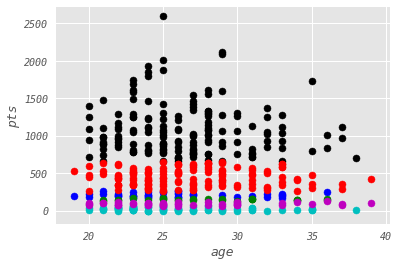

In [405]:
centroids_dict_12 = recalculate_centroids(basketball_4, 'age', 'pts', number_clusters_1)
centroids_dict_12

basketball_4['cluster'] = basketball_4.apply(lambda row: assign_to_cluster(row, centroids_dict_12, "age", "pts"), 
                                             axis=1)
cluster_visualization(basketball_4, 'age', 'pts', number_clusters_1)

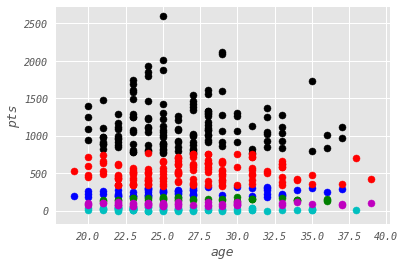

In [406]:
centroids_dict_13 = recalculate_centroids(basketball_4, 'age', 'pts', number_clusters_1)
centroids_dict_13

basketball_4['cluster'] = basketball_4.apply(lambda row: assign_to_cluster(row, centroids_dict_13, "age", "pts"), 
                                             axis=1)
cluster_visualization(basketball_4, 'age', 'pts', number_clusters_1)

The recalculation results in slight different clusters.

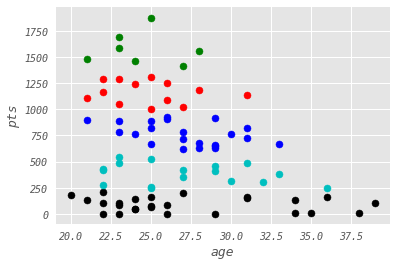

In [407]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_clusters_2)
kmeans.fit(point_guards[['age', 'pts']])
point_guards['cluster'] = kmeans.labels_

cluster_visualization(point_guards, 'age', 'pts', number_clusters_2)

Sklearn runs the clustering process many times. This converts K-Means to a final state and results in clearer assignments.

### Data modeling 2: K-Means on average points and assits ratio

#### Creating performance metrics

Average points each game for every player

In [408]:
# total points(pts); g: number of games made
# -> points each game: peg =  pts / g

print(point_guards.columns)

point_guards['peg']=(point_guards['pts'] / point_guards.g).round(2)

point_guards[['player', 'pos', 'g', 'pts', 'peg']].head()

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'cluster'],
      dtype='object')


,player,pos,g,pts,peg
24,D.J. Augustin,PG,71,930,13.10
29,Leandro Barbosa,PG,20,150,7.50
30,Jose Barea,PG,79,660,8.35
38,Jerryd Bayless,PG,72,666,9.25
50,Steve Blake,PG,55,378,6.87


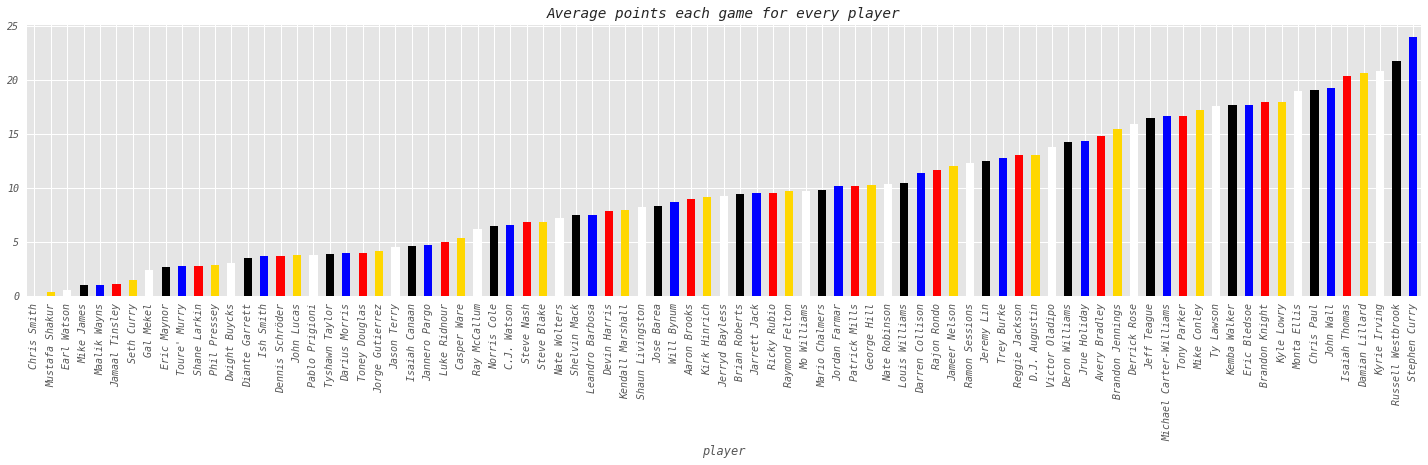

In [409]:
point_guards.sort_values(by="peg").plot(kind="bar", x="player",y="peg", 
                                        legend=False, figsize=(25,5),
                                        title="Average points each game for every player", 
                                        color = ['red', "gold", "white", "black", "blue"])
plt.show()

Ratio of assits to total turnover

In [410]:
# filter for tov = 0
point_guards = point_guards.query("tov != 0").copy()
point_guards['atturn'] = point_guards.ast / point_guards.tov 

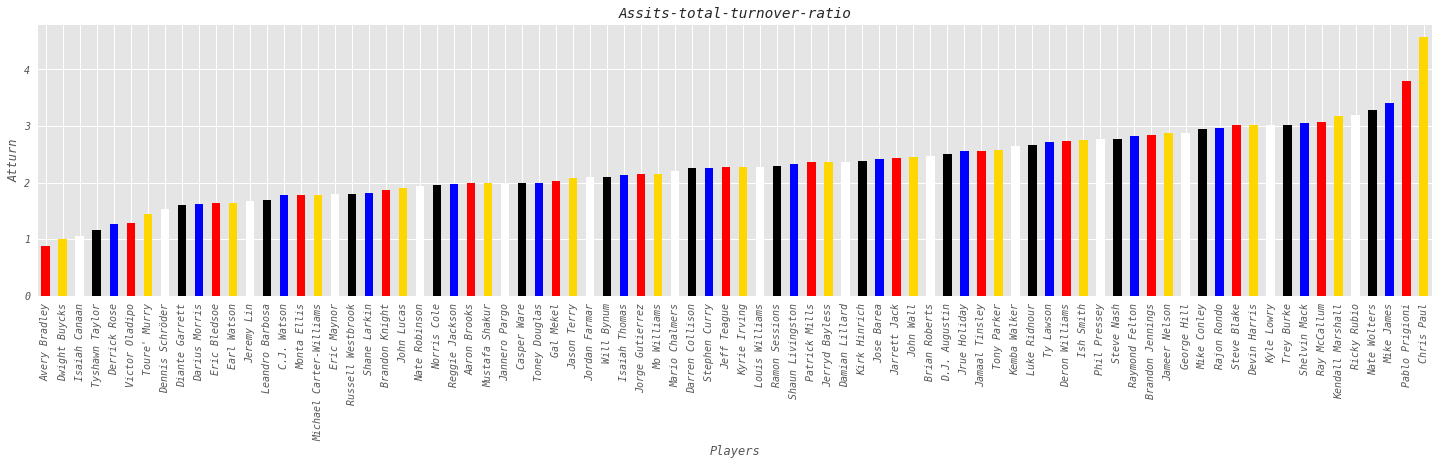

In [411]:
point_guards.sort_values(by="atturn").plot(x='player', y='atturn', kind="bar",
                          title="Assits-total-turnover-ratio", 
                          color = ['red', "gold", "white", "black", "blue"], legend=False, figsize=(25,5),
                          sort_columns=False
                          )
plt.xlabel("Players")
plt.ylabel("Atturn")
plt.show()

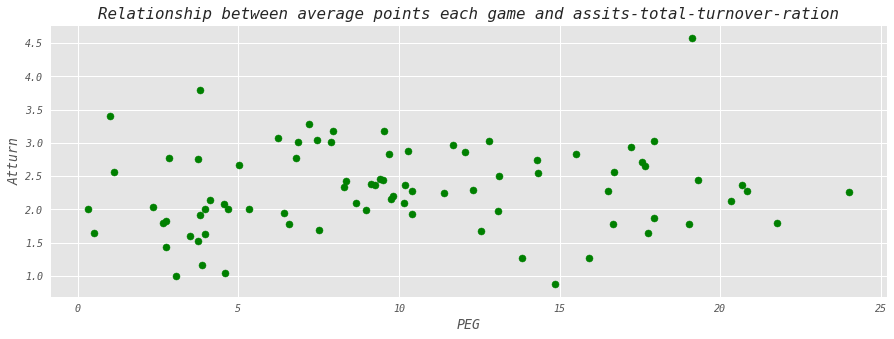

In [412]:
plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(15,5))
ax.scatter(x=point_guards.peg, y=point_guards.atturn, color="green")
ax.set_title("Relationship between average points each game and assits-total-turnover-ration")
ax.set_xlabel("PEG")
ax.set_ylabel("Atturn")



plt.show()

There is not a clear trend, but 4 or 5 sections differentiating groups of players or cluster of players.

In [413]:
number_clusters_2 = 5
# Initialize the clusters by randomly choosing some points out of the data set
random_initial_points_2 = np.random.choice(point_guards.index, size=number_clusters_2)
# The random point are the centroids
# Later the distances of all observations to the centroids is calculated
# Observations are assigned to a centroid with the lowest Euclidian distance.
centroids_2 = point_guards.loc[random_initial_points_2]
# The centroids are actual observations of the data set, in this case players
print(centroids_2.iloc[:,:4])
print(centroids_2.shape)

               player pos  age bref_team_id
261      Shane Larkin  PG   21          DAL
387    Ramon Sessions  PG   27          TOT
78         Will Bynum  PG   31          DET
415    Tyshawn Taylor  PG   23          BRK
274  Shaun Livingston  PG   28          BRK
(5, 34)


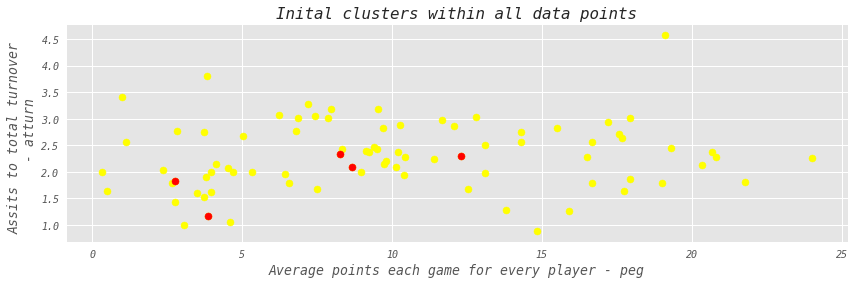

In [414]:
fig, ax = plt.subplots(1,1,figsize=(14,4))
ax.scatter(point_guards['peg'], point_guards['atturn'], c='yellow')
ax.scatter(centroids_2['peg'], centroids_2['atturn'], c='red')
ax.set_title("Inital clusters within all data points")
ax.set_xlabel("Average points each game for every player - peg")
ax.set_ylabel("Assits to total turnover \n - atturn")
plt.show()

The 5 red points are the randomly generated inital clusters.

In [415]:
centroids_dict_2 = centroids_to_dict(centroids_2, 'peg', 'atturn')
centroids_dict_2

{0: [2.75, 1.8205128205128205],
 1: [12.3, 2.2972972972972974],
 2: [8.66, 2.0970873786407767],
 3: [3.87, 1.1612903225806452],
 4: [8.28, 2.3333333333333335]}

In [416]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row, centroids_dict_2, 'peg', 'atturn'), axis=1)
point_guards.reset_index(inplace=True)
point_guards.loc[0:15, ['player', 'pos', 'age', 'cluster']]


,player,pos,age,cluster
0,D.J. Augustin,PG,26,1
1,Leandro Barbosa,PG,31,4
2,Jose Barea,PG,29,4
3,Jerryd Bayless,PG,25,2
4,Steve Blake,PG,33,4
5,Eric Bledsoe,PG,24,1
6,Avery Bradley,PG,23,1
7,Aaron Brooks,PG,29,2
8,Trey Burke,PG,21,1
9,Dwight Buycks,PG,24,3


1    31
2    15
3    13
4    12
0    11
Name: cluster, dtype: int64


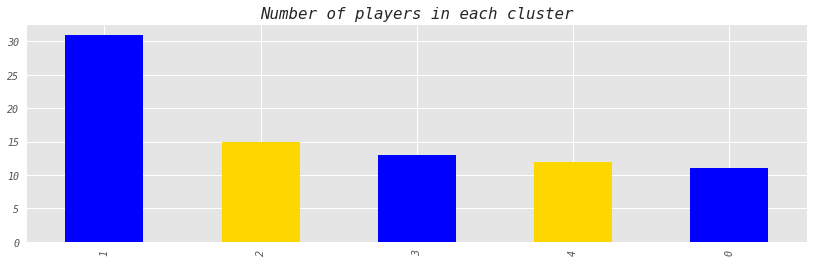

In [417]:
point_guards_cluster = point_guards.sort_values('cluster')
print(point_guards_cluster.cluster.value_counts())
point_guards_cluster.cluster.value_counts().plot(kind="bar", color=['blue', "gold"],
                                                 title="Number of players in each cluster", 
                                                 figsize=(14,4))

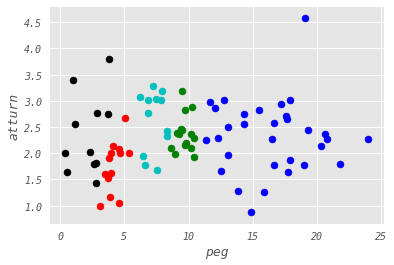

In [418]:
cluster_visualization(point_guards, 'peg', 'atturn', number_clusters_2)

In [419]:
centroids_dict_21 = recalculate_centroids(point_guards, 'peg', 'atturn', number_clusters_2)
centroids_dict_21

{0: [2.1672727272727275, 2.3648751163048094],
 1: [16.407096774193551, 2.3296531690315971],
 2: [9.6726666666666663, 2.3775942331074447],
 3: [4.1669230769230765, 1.7504475351117337],
 4: [7.291666666666667, 2.6300956977105105]}

In [420]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row, centroids_dict_21, 'peg', 'atturn'), axis=1)
point_guards.reset_index(inplace=True)
point_guards.loc[:5, ['player', 'pos', 'age', 'cluster']]

,player,pos,age,cluster
0,D.J. Augustin,PG,26,1
1,Leandro Barbosa,PG,31,4
2,Jose Barea,PG,29,4
3,Jerryd Bayless,PG,25,2
4,Steve Blake,PG,33,4
5,Eric Bledsoe,PG,24,1


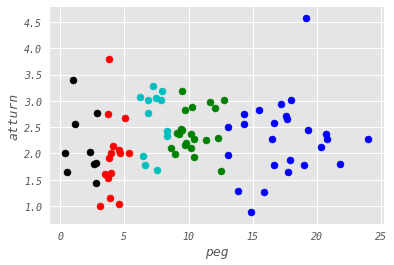

In [421]:
cluster_visualization(point_guards, 'peg', 'atturn', number_clusters_2)

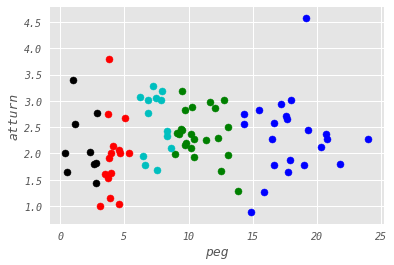

In [422]:
centroids_dict_22 = recalculate_centroids(point_guards, 'peg', 'atturn', number_clusters_2)
centroids_dict_22
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row, centroids_dict_22, 'peg', 'atturn'), axis=1)
point_guards.loc[:5, ['player', 'pos', 'age', 'cluster']]
cluster_visualization(point_guards, 'peg', 'atturn', number_clusters_2)

In [423]:
### Working with sklearn implementation

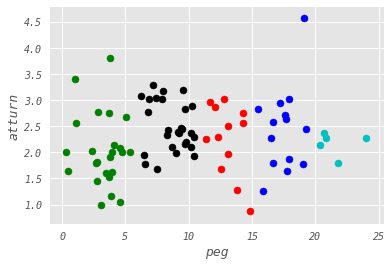

In [424]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_clusters_2)
kmeans.fit(point_guards[['peg', 'atturn']])
point_guards['cluster'] = kmeans.labels_

cluster_visualization(point_guards, 'peg', 'atturn', number_clusters_2)

Sklearn runs the clustering process many times. This converts K-Means to a final state and results in clearer assignments.